<a href="https://colab.research.google.com/github/amantiwari-java/Shopper-Spectrum-E-commerce-Analytics/blob/main/Shopper_Spectrum_Customer_Segmentation_and_Product_Analysis%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 -Project Name**

 Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce


#**2-Project Type**  

Unsupervised Machine Learning - Clustering  Collaborative Filtering - Recommendation System


#  **Contribution** - Individual
##### **Team Member 1 -** Aman Tiwari
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **3-Project Summary -**

This project aims to leverage transaction data from an online retail business to gain valuable insights into customer purchasing behaviors. The core objectives include uncovering patterns in customer purchase behavior, performing customer segmentation using **Recency, Frequency, and Monetary (RFM) analysis**, and developing a **product recommendation system** based on collaborative filtering techniques. The project will involve comprehensive data cleaning, exploratory data analysis, feature engineering (specifically RFM calculation), and the application of clustering algorithms for segmentation. A key deliverable will be a **Streamlit web application** that integrates both the product recommendation module and the customer segmentation module for real-time interaction and prediction.

# **4-GitHub Link -**


# **5-Problem Statement**


The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors.Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth.This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.

# **6-General Guidelines**


Read through the "General Guidelines" section in the project document . These guidelines outline expectations for code structure, formatting, comments, chart requirements, and model evaluation throughout the project.

# **Lets Begin**

## ***Import Libraries***


In [48]:
# Import Libraries

# For data manipulation and analysis
import pandas as pd #
import numpy as np #

# For data visualization
import matplotlib.pyplot as plt #
import seaborn as sns #

# For machine learning (Clustering, Recommendation System)
from sklearn.preprocessing import StandardScaler # For scaling RFM values
from sklearn.cluster import KMeans # One of the clustering algorithms
from sklearn.metrics import silhouette_score # For evaluating clustering
from scipy.cluster.hierarchy import dendrogram, linkage # For hierarchical clustering visualization

# For recommendation system (Collaborative Filtering)
from sklearn.metrics.pairwise import cosine_similarity # To compute similarity between products

# For date/time operations (critical for Recency calculation)
from datetime import datetime, timedelta

# To ignore warnings (optional, but good for cleaner output)
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## ***Load Dataset***

In [49]:
# Load Dataset

try:
    df = pd.read_csv('online_retail.csv') # Load the CSV file
    print("Dataset loaded successfully!")
    print(f"Shape of the dataset: {df.shape}")
except FileNotFoundError:
    print("Error: 'online_retail.csv' not found. Please upload the dataset to Colab session storage or ensure the filename is correct.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully!
Shape of the dataset: (541909, 8)


##  ***Dataset Collection and Understanding***


###  Dataset First Look

In [50]:
# Dataset First Look

print("--- First 5 rows of the dataset ---")
print(df.head())

--- First 5 rows of the dataset ---
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  


 ### Dataset Information

In [51]:
# Dataset Information

print("\n--- Information about the dataset ---")
df.info()


--- Information about the dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Dataset Rows & Columns Count

In [52]:
# Dataset Rows & Columns count

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 541909 rows and 8 columns.


### Check for Duplicate Values

In [53]:
# Check for Duplicate Values

print("\n--- Number of duplicate rows ---")
print(df.duplicated().sum())


--- Number of duplicate rows ---
5268


### Visualize Missing Values

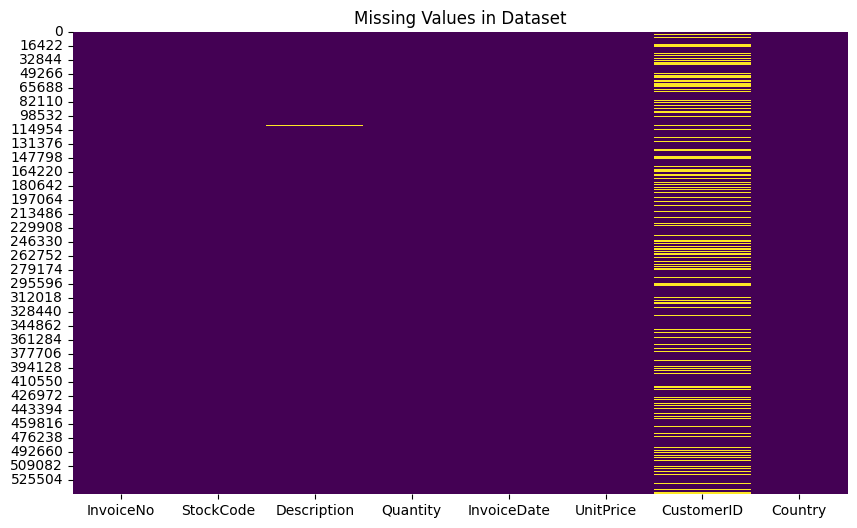

In [54]:
# Visualize Missing Values

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

### Dataset Statistical Description

In [55]:
# Dataset Statistical Description

print("\n--- Statistical description of the dataset (Numerical and Categorical) ---")
print(df.describe(include='all'))


--- Statistical description of the dataset (Numerical and Categorical) ---
       InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN       

## ***Data Preprocessing***

### Handle Missing CustomerID

In [56]:
# Handle Missing CustomerID
initial_rows = df.shape[0]
df.dropna(subset=['CustomerID'], inplace=True)
print(f"Removed rows with missing CustomerID. New shape: {df.shape}")
print(f"Number of rows removed: {initial_rows - df.shape[0]}")

Removed rows with missing CustomerID. New shape: (406829, 8)
Number of rows removed: 135080


### Exclude Cancelled Invoices

In [57]:
# Exclude Cancelled Invoices
initial_rows_after_customer_id_drop = df.shape[0]
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print(f"Removed cancelled invoices (InvoiceNo starting with 'C'). New shape: {df.shape}")
print(f"Number of rows removed: {initial_rows_after_customer_id_drop - df.shape[0]}")

Removed cancelled invoices (InvoiceNo starting with 'C'). New shape: (397924, 8)
Number of rows removed: 8905


### Remove Negative or Zero Quantities and Prices

In [58]:
# Remove Negative or Zero Quantities and Prices
initial_rows_after_cancel_drop = df.shape[0]
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print(f"Removed rows with non-positive Quantity or UnitPrice. New shape: {df.shape}")
print(f"Number of rows removed: {initial_rows_after_cancel_drop - df.shape[0]}")

Removed rows with non-positive Quantity or UnitPrice. New shape: (397884, 8)
Number of rows removed: 40


### Convert Data Types

In [59]:
# Convert Data Types (InvoiceDate and CustomerID)

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("\nConverted 'InvoiceDate' to datetime type.")

# Convert CustomerID to integer (after ensuring no NaNs remain)
df['CustomerID'] = df['CustomerID'].astype(int)
# Clean Description column (remove leading/trailing spaces)
df['Description'] = df['Description'].astype(str).str.strip()
print("Converted 'CustomerID' to integer type.")

print("\nUpdated DataFrame Info (check dtypes):")
df.info()


Converted 'InvoiceDate' to datetime type.
Converted 'CustomerID' to integer type.

Updated DataFrame Info (check dtypes):
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


### Handle Duplicate Rows

In [60]:
# Handle Duplicate Rows
initial_rows_before_duplicate_drop = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"\nRemoved duplicate rows. New shape: {df.shape}")
print(f"Number of rows removed: {initial_rows_before_duplicate_drop - df.shape[0]}")


Removed duplicate rows. New shape: (392692, 8)
Number of rows removed: 5192


###  **Data Preprocessing** (Summary)  

 This phase involved systematically cleaning and transforming the raw transactional data based on the project's requirements and initial data observations.

**Key Preprocessing Steps Performed:**

1.  **Handling Missing CustomerID**: Rows with missing `CustomerID` were removed. This resulted in the removal of **135,080 rows**, as `CustomerID` is crucial for customer segmentation.
2. **Excluding Cancelled Invoices**: Transactions where `InvoiceNo` started with 'C' (indicating a cancelled order) were removed. This step eliminated **8,905 non-purchase records**.
3.  **Removing Non-Positive Quantities and Prices**: Rows with `Quantity` or `UnitPrice` less than or equal to zero were removed. This refined the dataset by removing **40 entries** that did not represent valid purchases.
4.  **Converting Data Types**:
    * `InvoiceDate` was converted from `object` type to `datetime64[ns]`. This is essential for time-based analysis and calculating 'Recency'.
    * `CustomerID` was converted from `float64` to `int64` after ensuring all missing values were handled.
5.  **Handling Duplicate Rows**: Exactly **5,192 duplicate rows** were identified and removed, ensuring each transaction record is unique.

**Impact**: These preprocessing steps collectively transformed the raw dataset of `541,909` entries into a clean and analysis-ready dataset of **`392,692` records**, with no missing values and appropriate data types for subsequent analysis and model building.

## **Exploratory Data Analysis (EDA)**

###  Analyze Transaction Volume by Country

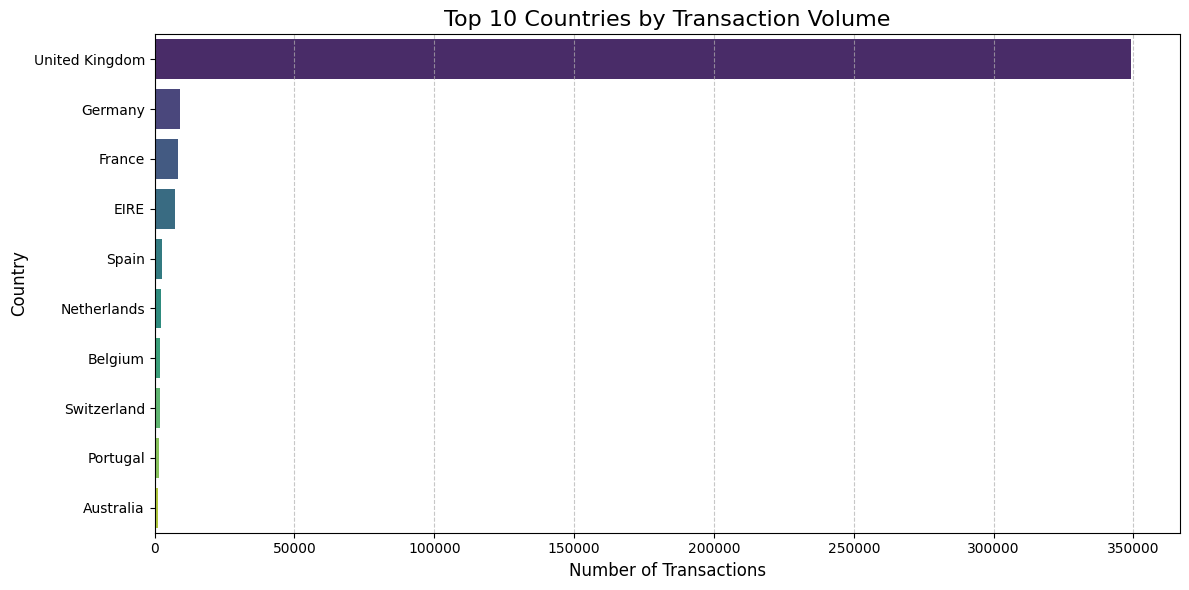


Transaction Volume by Country (Top 10):
          Country  Transaction_Count
0  United Kingdom             349203
1         Germany               9025
2          France               8326
3            EIRE               7226
4           Spain               2479
5     Netherlands               2359
6         Belgium               2031
7     Switzerland               1841
8        Portugal               1453
9       Australia               1181

United Kingdom accounts for 88.93% of total transactions.


In [61]:
# Analyze Transaction Volume by Country

country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Transaction_Count']

# Plotting the top N countries
n_top_countries = 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Transaction_Count', y='Country', data=country_counts.head(n_top_countries), palette='viridis')
plt.title(f'Top {n_top_countries} Countries by Transaction Volume', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nTransaction Volume by Country (Top 10):")
print(country_counts.head(n_top_countries))

# Percentage of transactions from United Kingdom
uk_transactions = country_counts[country_counts['Country'] == 'United Kingdom']['Transaction_Count'].iloc[0]
total_transactions = country_counts['Transaction_Count'].sum()
uk_percentage = (uk_transactions / total_transactions) * 100
print(f"\nUnited Kingdom accounts for {uk_percentage:.2f}% of total transactions.")

###  Identify Top-Selling Products

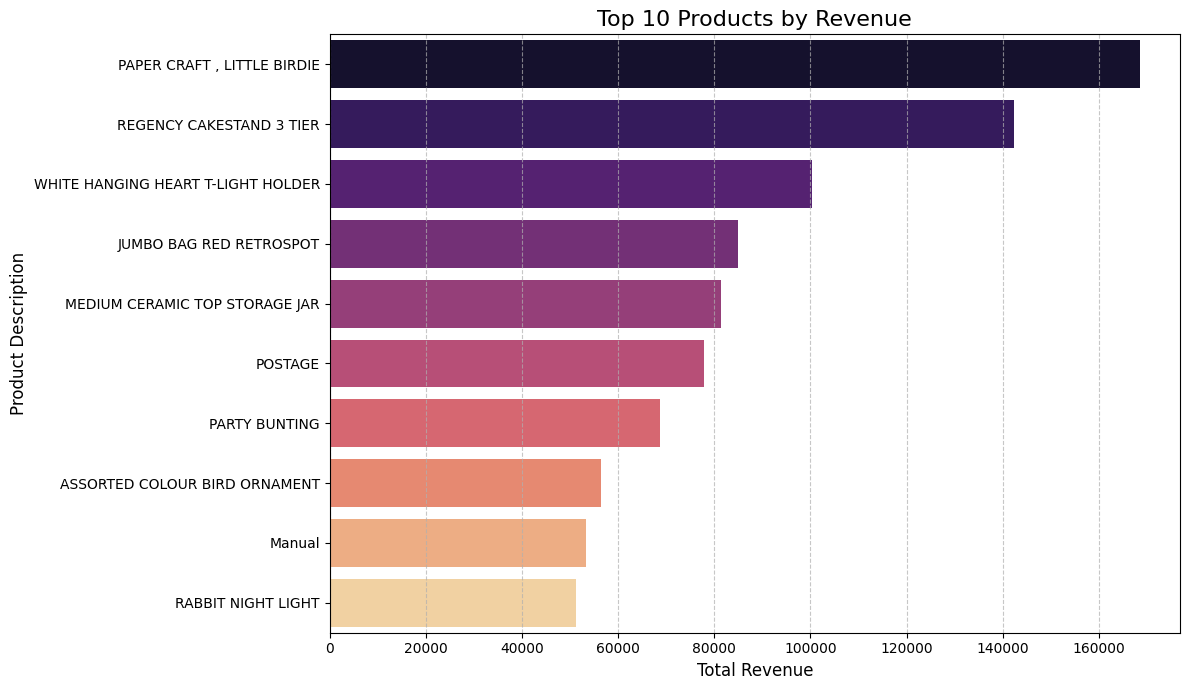


Top 10 Products by Total Revenue:
                          Description  TotalPrice
0         PAPER CRAFT , LITTLE BIRDIE   168469.60
1            REGENCY CAKESTAND 3 TIER   142264.75
2  WHITE HANGING HEART T-LIGHT HOLDER   100392.10
3             JUMBO BAG RED RETROSPOT    85040.54
4      MEDIUM CERAMIC TOP STORAGE JAR    81416.73
5                             POSTAGE    77803.96
6                       PARTY BUNTING    68785.23
7       ASSORTED COLOUR BIRD ORNAMENT    56413.03
8                              Manual    53419.93
9                  RABBIT NIGHT LIGHT    51251.24

Top 10 Products by Quantity Sold:
                          Description  Quantity
0         PAPER CRAFT , LITTLE BIRDIE     80995
1      MEDIUM CERAMIC TOP STORAGE JAR     77916
2   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
3             JUMBO BAG RED RETROSPOT     46078
4  WHITE HANGING HEART T-LIGHT HOLDER     36706
5       ASSORTED COLOUR BIRD ORNAMENT     35263
6     PACK OF 72 RETROSPOT CAKE CASES     33

In [62]:
# Identify Top-Selling Products

# Calculate total sales for each product (Quantity * UnitPrice)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group by Description (product name) and sum the TotalPrice
top_products_by_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

# Identify top products by quantity sold
top_products_by_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index()

# Plotting the top N products by revenue
n_top_products = 10
plt.figure(figsize=(12, 7))
sns.barplot(x='TotalPrice', y='Description', data=top_products_by_revenue.head(n_top_products), palette='magma')
plt.title(f'Top {n_top_products} Products by Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"\nTop {n_top_products} Products by Total Revenue:")
print(top_products_by_revenue.head(n_top_products))

print(f"\nTop {n_top_products} Products by Quantity Sold:")
print(top_products_by_quantity.head(n_top_products))

###  Visualize Purchase Trends Over Time

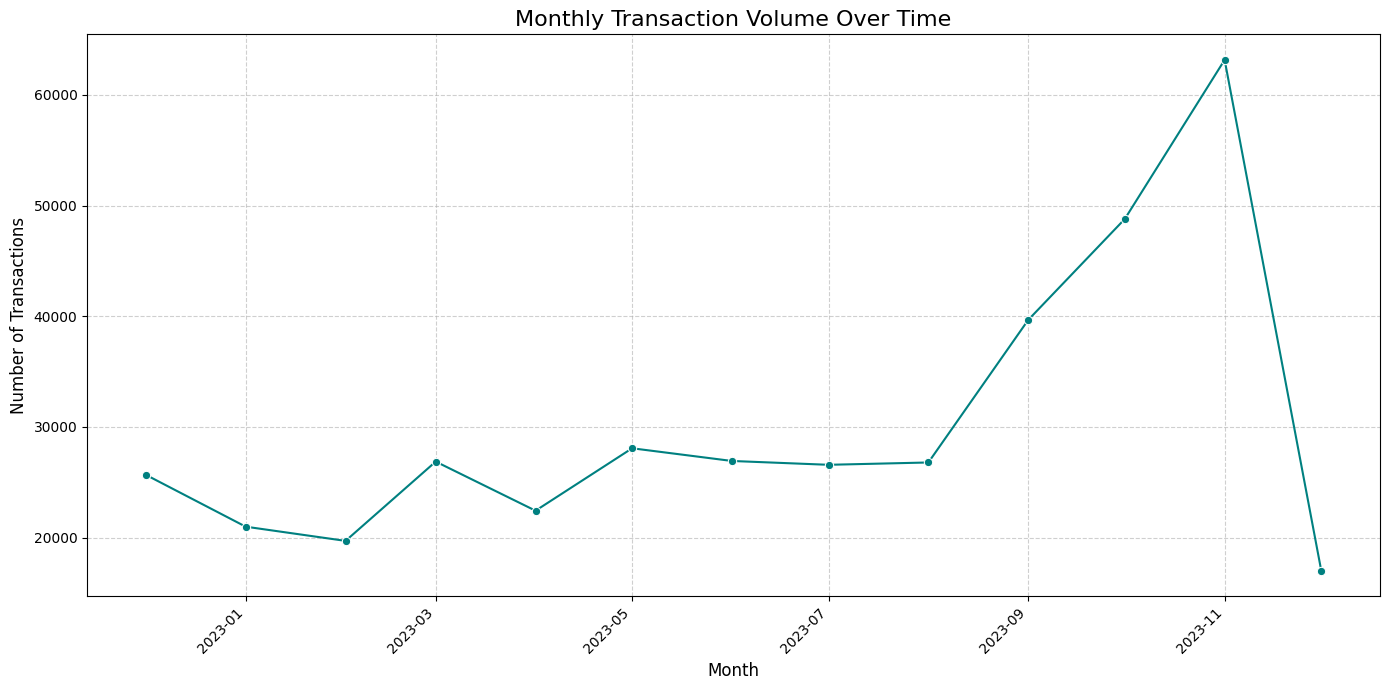

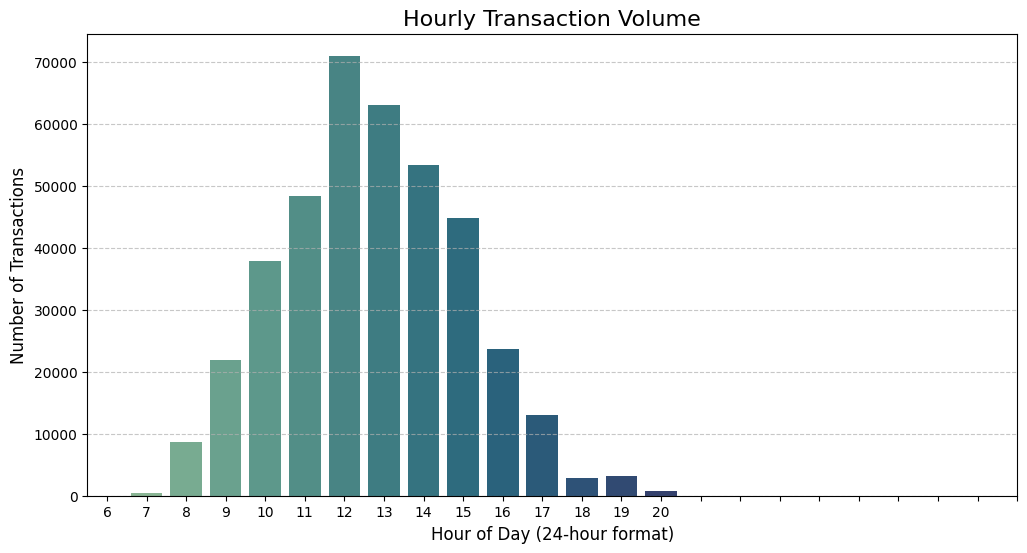


Monthly Transaction Volume (Head):
       Month  Transaction_Count
0 2022-12-01              25670
1 2023-01-01              20988
2 2023-02-01              19706
3 2023-03-01              26870
4 2023-04-01              22433

Hourly Transaction Volume:
    Hour  Transaction_Count
0      6                  1
1      7                379
2      8               8687
3      9              21927
4     10              37773
5     11              48365
6     12              70938
7     13              63019
8     14              53251
9     15              44790
10    16              23715
11    17              12941
12    18               2895
13    19               3233
14    20                778


In [63]:
# Visualize Purchase Trends Over Time

# Extract Month and Hour from InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

# --- Monthly Transaction Trend ---
monthly_transactions = df['InvoiceMonth'].value_counts().sort_index().reset_index()
monthly_transactions.columns = ['Month', 'Transaction_Count']
monthly_transactions['Month'] = monthly_transactions['Month'].dt.to_timestamp() # Convert Period to Timestamp for plotting

plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Transaction_Count', data=monthly_transactions, marker='o', color='teal')
plt.title('Monthly Transaction Volume Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Hourly Transaction Trend ---
hourly_transactions = df['InvoiceHour'].value_counts().sort_index().reset_index()
hourly_transactions.columns = ['Hour', 'Transaction_Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Transaction_Count', data=hourly_transactions, palette='crest')
plt.title('Hourly Transaction Volume', fontsize=16)
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nMonthly Transaction Volume (Head):")
print(monthly_transactions.head())
print("\nHourly Transaction Volume:")
print(hourly_transactions)

 ### Inspect Monetary Distribution per Transaction and Customer

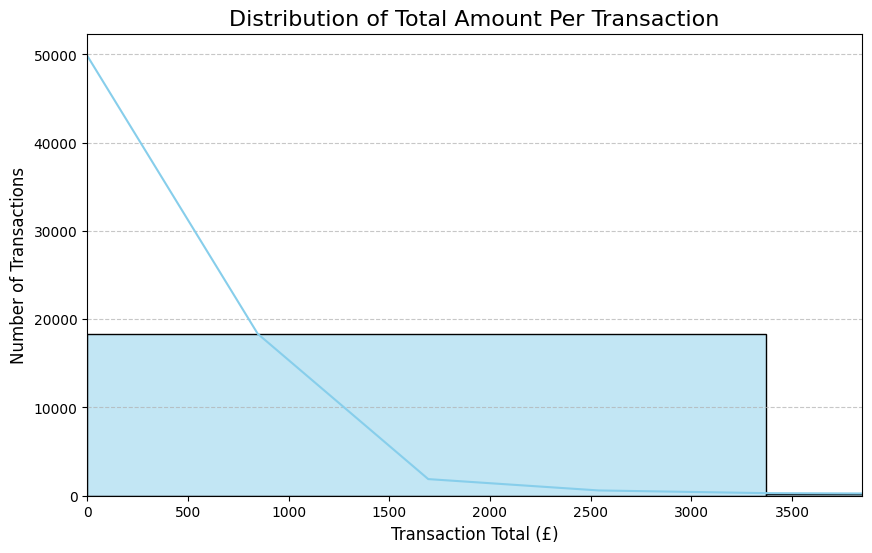


Statistical description of Transaction Total:
count     18532.00000
mean        479.56016
std        1678.08258
min           0.38000
25%         157.34000
50%         302.57500
75%         469.57000
max      168469.60000
Name: TransactionTotal, dtype: float64


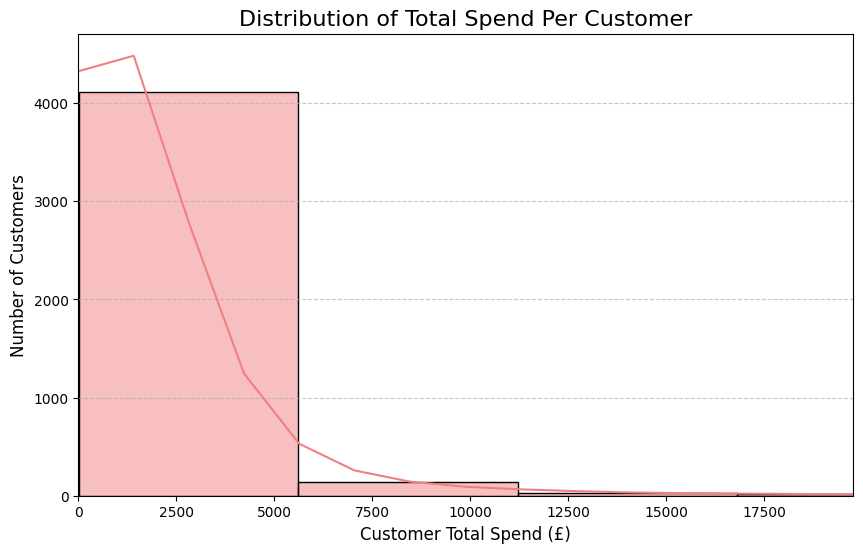


Statistical description of Customer Total Spend:
count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: CustomerTotalSpend, dtype: float64


In [64]:
# Inspect Monetary Distribution per Transaction and Customer

# Calculate TotalAmount per transaction (InvoiceNo)
# We need to sum TotalPrice for each InvoiceNo
transaction_monetary = df.groupby('InvoiceNo')['TotalPrice'].sum().reset_index()
transaction_monetary.rename(columns={'TotalPrice': 'TransactionTotal'}, inplace=True)

# Visualize TransactionTotal distribution (e.g., histogram)
plt.figure(figsize=(10, 6))
sns.histplot(transaction_monetary['TransactionTotal'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Amount Per Transaction', fontsize=16)
plt.xlabel('Transaction Total (£)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlim(0, transaction_monetary['TransactionTotal'].quantile(0.99)) # Limit x-axis to 99th percentile for better view
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nStatistical description of Transaction Total:")
print(transaction_monetary['TransactionTotal'].describe())

# Calculate TotalAmount per customer (for CustomerID) - This will be used in RFM later
# But good to inspect here as well.
customer_monetary = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_monetary.rename(columns={'TotalPrice': 'CustomerTotalSpend'}, inplace=True)

# Visualize CustomerTotalSpend distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_monetary['CustomerTotalSpend'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Total Spend Per Customer', fontsize=16)
plt.xlabel('Customer Total Spend (£)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(0, customer_monetary['CustomerTotalSpend'].quantile(0.99)) # Limit x-axis to 99th percentile for better view
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nStatistical description of Customer Total Spend:")
print(customer_monetary['CustomerTotalSpend'].describe())

##  ***Clustering Methodology***

 ### Feature Engineering: Calculate Recency, Frequency, and Monetary (RFM) Values

In [65]:
# Calculate RFM Values

# Determine the 'snapshot date' for Recency calculation
# This is usually the day after the last invoice date in the dataset
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
print(f"Snapshot date for RFM calculation: {snapshot_date}")

# Group by CustomerID to calculate RFM
rfm_df = df.groupby('CustomerID').agg(
    # Recency: Calculate days since last purchase (snapshot_date - max InvoiceDate)
    Recency=('InvoiceDate', lambda date: (snapshot_date - date.max()).days),
    # Frequency: Count unique InvoiceNo (number of transactions)
    Frequency=('InvoiceNo', 'nunique'),
    # Monetary: Sum TotalPrice
    Monetary=('TotalPrice', 'sum')
).reset_index()

print("\nRFM DataFrame (First 5 rows):")
print(rfm_df.head())
print(f"Shape of RFM DataFrame: {rfm_df.shape}")

# Check statistical description of RFM values
print("\nStatistical description of RFM values:")
print(rfm_df.describe())

Snapshot date for RFM calculation: 2023-12-10 12:50:00

RFM DataFrame (First 5 rows):
   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40
Shape of RFM DataFrame: (4338, 4)

Statistical description of RFM values:
         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2048.688081
std     1721.808492   100.014169     7.697998    8985.230220
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     306.482500
50%    15299.500000    51.000000     2.000000     668.570000
75%    16778.750000   142.000000     5.000000    1660.597500
max    18287.000000   374.000000   209.000000  280206.020000


### Standardize/Normalize the RFM Values

In [66]:
# Standardize/Normalize the RFM Values

from sklearn.preprocessing import StandardScaler

# Select only the RFM columns for scaling
rfm_scaled_data = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Apply log transformation to skewed features (Frequency and Monetary) to reduce skewness
# Add a small constant (1) before log to handle zero values if any, though our min is 1.
rfm_scaled_data['Frequency_log'] = np.log1p(rfm_scaled_data['Frequency'])
rfm_scaled_data['Monetary_log'] = np.log1p(rfm_scaled_data['Monetary'])
rfm_scaled_data['Recency_log'] = np.log1p(rfm_scaled_data['Recency']) # Log-transform Recency as well, often beneficial

# Use the log-transformed features for scaling
rfm_features_for_scaling = rfm_scaled_data[['Recency_log', 'Frequency_log', 'Monetary_log']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the RFM data
scaled_rfm_values = scaler.fit_transform(rfm_features_for_scaling)

# Convert scaled values back to a DataFrame for easier use
scaled_rfm_df = pd.DataFrame(scaled_rfm_values, columns=rfm_features_for_scaling.columns, index=rfm_df.index)

print("RFM values standardized successfully!")
print(f"Shape of scaled RFM DataFrame: {scaled_rfm_df.shape}")
print("Scaled RFM values (First 5 rows):")
print(scaled_rfm_df.head())

RFM values standardized successfully!
Shape of scaled RFM DataFrame: (4338, 3)
Scaled RFM values (First 5 rows):
   Recency_log  Frequency_log  Monetary_log
0     1.461993      -0.955214      3.707716
1    -2.038734       1.074425      1.414903
2     0.373104       0.386304      0.720024
3    -0.623086      -0.955214      0.702287
4     1.424558      -0.955214     -0.614514


### Visualize RFM Distributions (Post-Scaling)

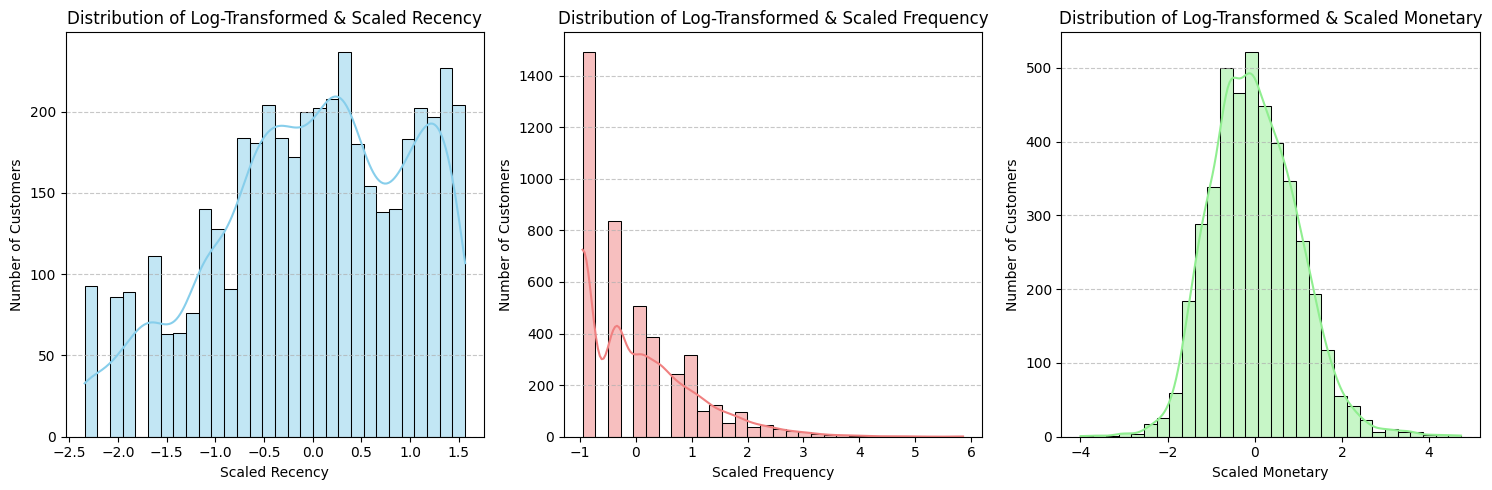


Statistical description of Scaled RFM values:
        Recency_log  Frequency_log  Monetary_log
count  4.338000e+03   4.338000e+03  4.338000e+03
mean  -9.172520e-17  -7.206980e-17 -3.669008e-16
std    1.000115e+00   1.000115e+00  1.000115e+00
min   -2.341296e+00  -9.552143e-01 -3.997811e+00
25%   -6.613615e-01  -9.552143e-01 -6.835802e-01
50%    8.992557e-02  -3.615828e-01 -6.510929e-02
75%    8.447915e-01   6.532370e-01  6.572178e-01
max    1.564198e+00   5.858535e+00  4.732381e+00


In [67]:
# Visualize RFM Distributions (Post-Scaling)

plt.figure(figsize=(15, 5))

# Plot histogram for Recency_log
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.histplot(scaled_rfm_df['Recency_log'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Log-Transformed & Scaled Recency', fontsize=12)
plt.xlabel('Scaled Recency', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot histogram for Frequency_log
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.histplot(scaled_rfm_df['Frequency_log'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Log-Transformed & Scaled Frequency', fontsize=12)
plt.xlabel('Scaled Frequency', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot histogram for Monetary_log
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.histplot(scaled_rfm_df['Monetary_log'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Log-Transformed & Scaled Monetary', fontsize=12)
plt.xlabel('Scaled Monetary', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

print("\nStatistical description of Scaled RFM values:")
print(scaled_rfm_df.describe())

### Clustering Algorithm (K-Means) & Determine Optimal K (Elbow Method)

--- Clustering Methodology: K-Means Algorithm ---

--- Determining Optimal Number of Clusters (Elbow Method) ---


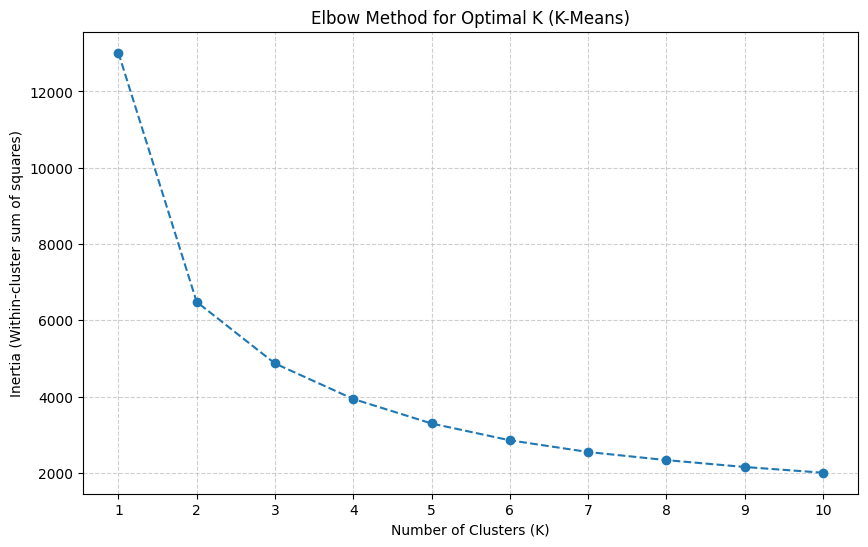


Observe the Elbow Method plot above to identify the 'elbow point' where the decrease in inertia starts to slow down significantly. This will help determine the optimal K for K-Means.

Optimal K chosen based on Elbow Method: 4

Assigned 4 clusters to customers.
First 5 customers with their assigned clusters:
   CustomerID  Recency  Frequency  Monetary  Cluster
0       12346      326          1  77183.60        3
1       12347        2          7   4310.00        0
2       12348       75          4   1797.24        3
3       12349       19          1   1757.55        2
4       12350      310          1    334.40        1

Final K-Means Inertia for K=4: 3939.05
Silhouette Score for K=4: 0.338

Count of customers in each cluster (K-Means):
Cluster
1    1622
3    1166
2     837
0     713
Name: count, dtype: int64


In [68]:
 # Choose Clustering Algorithm (K-Means) & Determine Optimal K (Elbow Method)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Clustering Methodology: K-Means Algorithm ---")
print("\n--- Determining Optimal Number of Clusters (Elbow Method) ---")

# Define a range of K values to test
k_range = range(1, 11) # Test from 1 to 10 clusters

# List to store inertia values for each K
inertia = []

# Loop through K values and fit KMeans
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init suppresses warning
    kmeans.fit(scaled_rfm_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nObserve the Elbow Method plot above to identify the 'elbow point' where the decrease in inertia starts to slow down significantly. This will help determine the optimal K for K-Means.")
# Run K-Means Clustering & Evaluate Performance

# Chosen optimal K based on Elbow Method
optimal_k_kmeans = 4
print(f"\nOptimal K chosen based on Elbow Method: {optimal_k_kmeans}")

# Initialize and fit KMeans with the chosen optimal_k
kmeans_model = KMeans(n_clusters=optimal_k_kmeans, random_state=42, n_init=10) # n_init suppresses warning
kmeans_model.fit(scaled_rfm_df)

# Get cluster labels for each customer
cluster_labels = kmeans_model.labels_

# Add cluster labels back to the original rfm_df
rfm_df['Cluster'] = cluster_labels

print(f"\nAssigned {rfm_df['Cluster'].nunique()} clusters to customers.")
print("First 5 customers with their assigned clusters:")
print(rfm_df.head())

# --- Evaluation Metrics for Model ---
# Inertia: The sum of squared distances of samples to their closest cluster center. Lower is better.
final_inertia = kmeans_model.inertia_
print(f"\nFinal K-Means Inertia for K={optimal_k_kmeans}: {final_inertia:.2f}")

# Silhouette Score: Measures how similar an object is to its own cluster (cohesion)
# compared to other clusters (separation). Ranges from -1 to +1. Higher value indicates better-defined clusters.
from sklearn.metrics import silhouette_score
if optimal_k_kmeans > 1:
    silhouette_avg = silhouette_score(scaled_rfm_df, cluster_labels)
    print(f"Silhouette Score for K={optimal_k_kmeans}: {silhouette_avg:.3f}")
else:
    print("Silhouette Score not applicable for K=1.")

# Display cluster counts
print(f"\nCount of customers in each cluster (K-Means):\n{rfm_df['Cluster'].value_counts()}")

### Label Clusters by Interpreting RFM Averages


Mean RFM values for each K-Means Cluster:
   Cluster  Recency  Frequency  Monetary
0        0    12.17      13.75   8088.02
1        1   181.51       1.32    341.00
2        2    17.70       2.19    557.32
3        3    71.64       4.08   1801.78


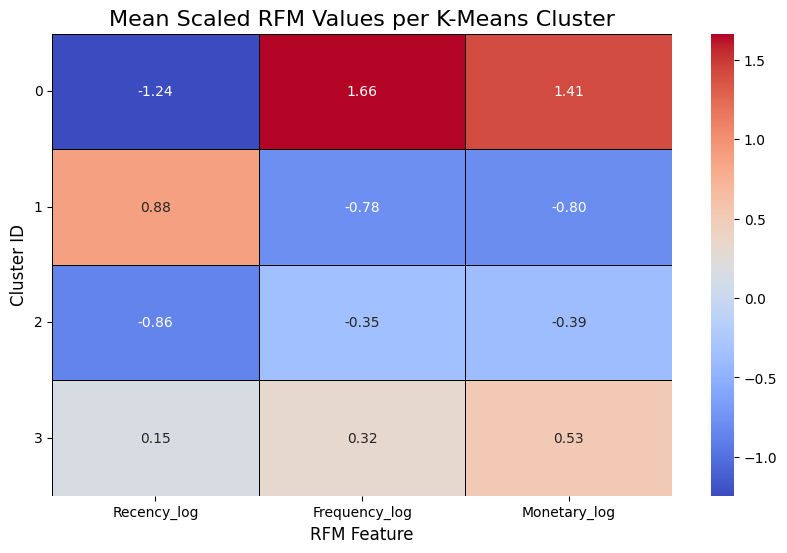

In [69]:
# Label Clusters by Interpreting RFM Averages

# Add the 'Cluster' column back to the original rfm_df if you haven't already
# (It was added in the previous step, so just ensure rfm_df is available)

# Group by Cluster and calculate the mean of original RFM values
cluster_rfm_means = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Round for better readability
cluster_rfm_means = cluster_rfm_means.round(2)

print("\nMean RFM values for each K-Means Cluster:")
print(cluster_rfm_means)

# --- Visualize Cluster Profiles (Optional, but good for understanding) ---
# For visualization, we can use a radar chart or a heatmap of scaled RFM means.
# Let's use a heatmap of the scaled RFM means for better comparison across clusters.

# Add cluster labels to scaled_rfm_df as well for visualization
scaled_rfm_df_with_clusters = scaled_rfm_df.copy()
scaled_rfm_df_with_clusters['Cluster'] = cluster_labels # Use labels from KMeans fit

# Calculate mean of scaled RFM values for each cluster
scaled_cluster_rfm_means = scaled_rfm_df_with_clusters.groupby('Cluster')[['Recency_log', 'Frequency_log', 'Monetary_log']].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(scaled_cluster_rfm_means, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Mean Scaled RFM Values per K-Means Cluster', fontsize=16)
plt.xlabel('RFM Feature', fontsize=12)
plt.ylabel('Cluster ID', fontsize=12)
plt.yticks(rotation=0)
plt.show()

### Visualize the Clusters (3D Plot)

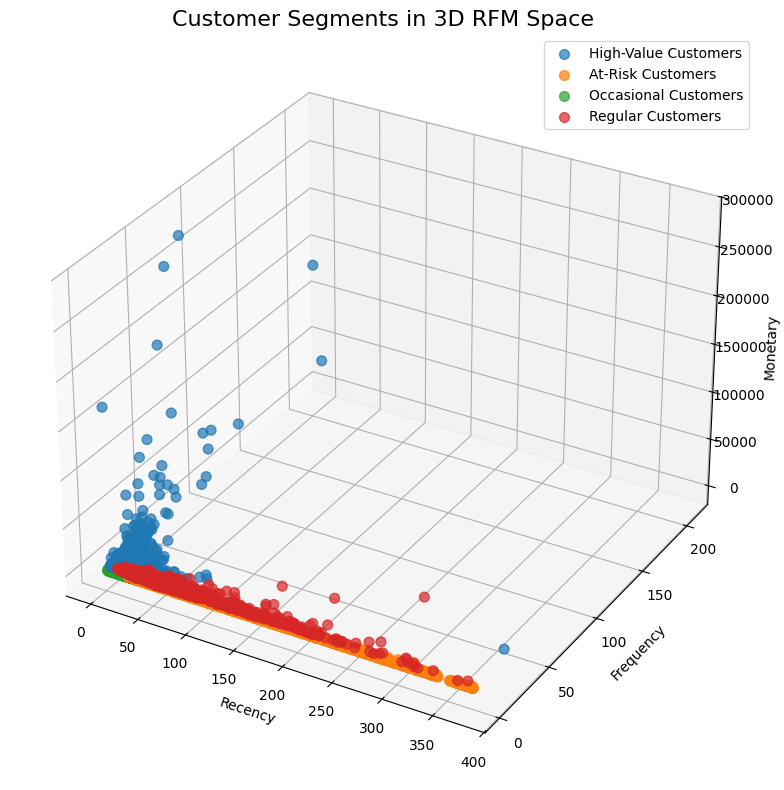


--- Alternative 2D Scatter Plots (for easier viewing) ---


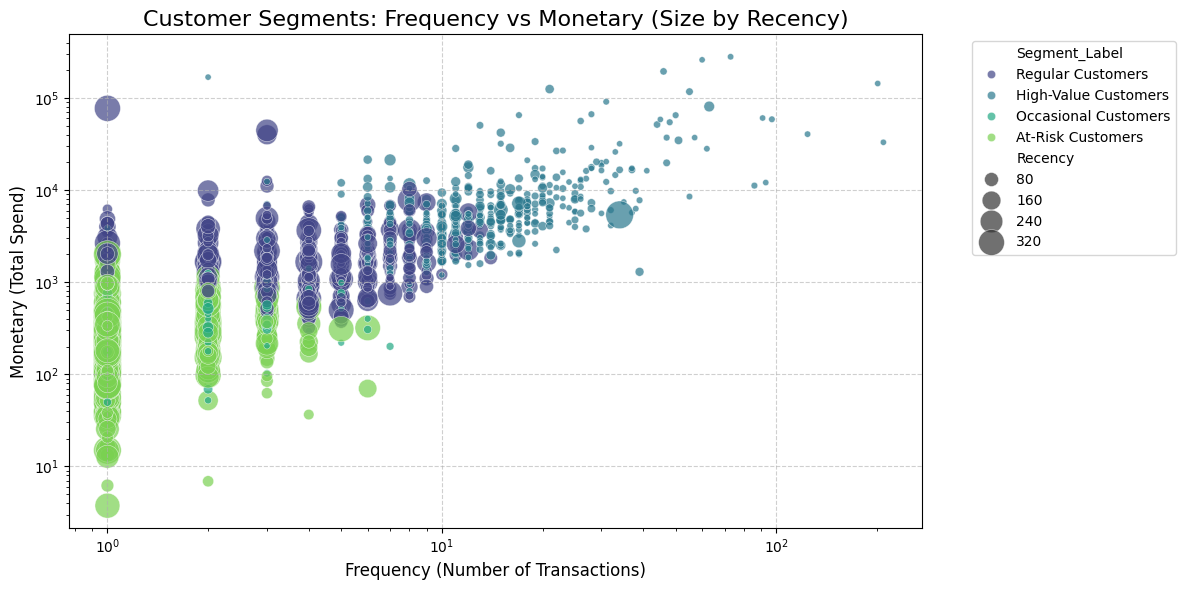

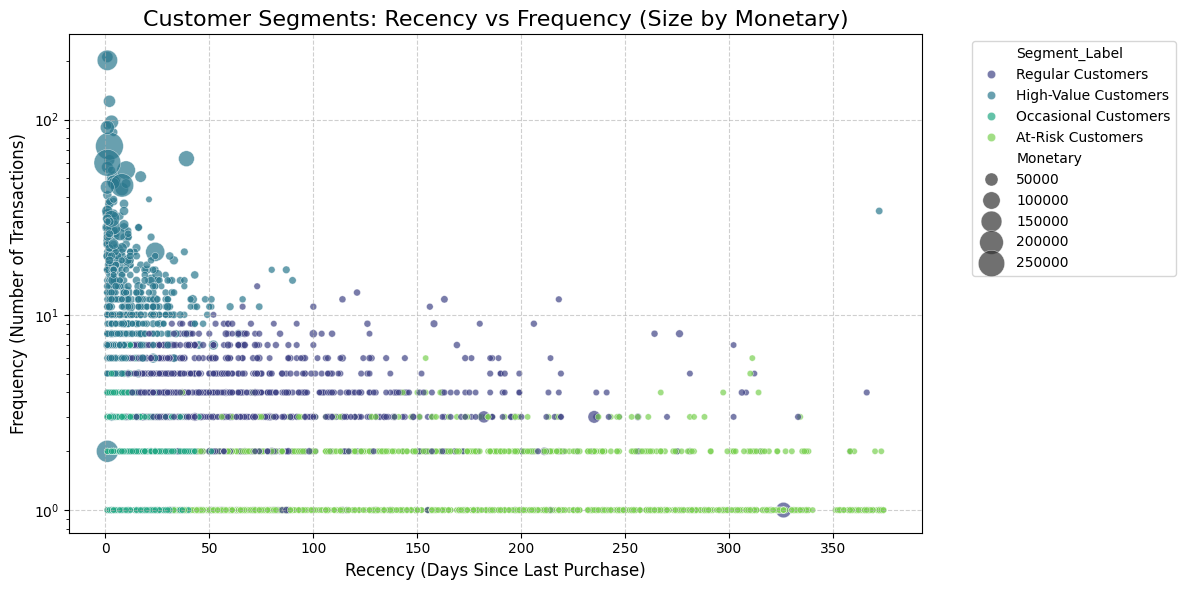

In [70]:
# Visualize the Clusters (3D Plot)

from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Map cluster IDs to human-readable labels for plotting
# Ensure the mapping matches your cluster interpretation above
cluster_label_mapping = {
    0: 'High-Value Customers',
    1: 'At-Risk Customers',
    2: 'Occasional Customers',
    3: 'Regular Customers'
}
rfm_df['Segment_Label'] = rfm_df['Cluster'].map(cluster_label_mapping)

# Use original (non-scaled) RFM values for plotting as they are more intuitive
# You can also use scaled_rfm_df, but for interpretation, original is often better visually
x_col = 'Recency'
y_col = 'Frequency'
z_col = 'Monetary'

# Scatter plot for each cluster
for cluster_id, label in cluster_label_mapping.items():
    subset = rfm_df[rfm_df['Cluster'] == cluster_id]
    ax.scatter(subset[x_col], subset[y_col], subset[z_col], label=label, s=50, alpha=0.7)

ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title('Customer Segments in 3D RFM Space', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

# --- Alternative 2D plots for easier viewing if 3D is too complex ---
print("\n--- Alternative 2D Scatter Plots (for easier viewing) ---")

# Plot Frequency vs Monetary, colored by Recency (or Cluster)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Segment_Label', size='Recency', sizes=(20, 400),
                data=rfm_df, palette='viridis', alpha=0.7)
plt.title('Customer Segments: Frequency vs Monetary (Size by Recency)', fontsize=16)
plt.xlabel('Frequency (Number of Transactions)', fontsize=12)
plt.ylabel('Monetary (Total Spend)', fontsize=12)
plt.xscale('log') # Use log scale for skewed features for better visual spread
plt.yscale('log') # Use log scale for skewed features
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot Recency vs Frequency, colored by Monetary
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Segment_Label', size='Monetary', sizes=(20, 400),
                data=rfm_df, palette='viridis', alpha=0.7)
plt.title('Customer Segments: Recency vs Frequency (Size by Monetary)', fontsize=16)
plt.xlabel('Recency (Days Since Last Purchase)', fontsize=12)
plt.ylabel('Frequency (Number of Transactions)', fontsize=12)
plt.yscale('log') # Use log scale for skewed features
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## ***Recommendation System Approach***

### Create Customer-Product Matrix

In [71]:
# Create Customer-Product Matrix

# We need a matrix where rows are CustomerIDs, columns are product Descriptions,
# and values represent a purchase (e.g., 1 or Quantity, let's use 1 for presence)

# Create a simplified DataFrame for the matrix, focusing on purchases (CustomerID, Description, and a dummy value)
# Using unique combinations ensures each customer-product pair is only counted once for presence.
customer_product_df = df.copy()

# For collaborative filtering, we are interested if a customer bought a product.
# Let's count how many times each customer bought each unique product (Description).
# This will be sparse, but can represent implicit feedback.
customer_product_matrix = customer_product_df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity', # Use Quantity as value, or 1 for just presence
    aggfunc='sum'       # Sum quantities if a customer bought the same item multiple times
).fillna(0) # Fill NaN with 0, meaning customer did not purchase that product

print("Customer-Product Matrix created (sparse representation with 0 for no purchase):")
print(customer_product_matrix.head())
print(f"Shape of Customer-Product Matrix: {customer_product_matrix.shape}")

Customer-Product Matrix created (sparse representation with 0 for no purchase):
Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
CustomerID                                                        
12346                           0.0                         0.0   
12347                           0.0                         0.0   
12348                           0.0                         0.0   
12349                           0.0                         0.0   
12350                           0.0                         0.0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
CustomerID                                                          
12346                              0.0                        0.0   
12347                              0.0                        0.0   
12348                              0.0                        0.0   
12349                              0.0                        0.0   
12350                              0

###  Compute Product Similarity (Cosine Similarity)

In [72]:
# Compute Product Similarity (Cosine Similarity)

from sklearn.metrics.pairwise import cosine_similarity

# To compute item-based similarity, we need to transpose the customer-product matrix.
# This makes rows into products and columns into customers.
product_product_matrix = customer_product_matrix.T

# Compute the cosine similarity between products
# The output will be a square matrix where each cell [i, j] represents the similarity between product i and product j.
product_similarity_matrix = cosine_similarity(product_product_matrix)

# Convert the numpy array similarity matrix into a DataFrame for easier handling,
# with product descriptions as both index and columns.
product_similarity_df = pd.DataFrame(product_similarity_matrix,
                                     index=product_product_matrix.index,
                                     columns=product_product_matrix.index)

print("Product-Product Similarity Matrix (Cosine Similarity) created:")
print(product_similarity_df.head())
print(f"Shape of Product Similarity Matrix: {product_similarity_df.shape}")

Product-Product Similarity Matrix (Cosine Similarity) created:
Description                   10 COLOUR SPACEBOY PEN  \
Description                                            
10 COLOUR SPACEBOY PEN                      1.000000   
12 COLOURED PARTY BALLOONS                  0.030829   
12 DAISY PEGS IN WOOD BOX                   0.005989   
12 EGG HOUSE PAINTED WOOD                   0.001467   
12 HANGING EGGS HAND PAINTED                0.000000   

Description                   12 COLOURED PARTY BALLOONS  \
Description                                                
10 COLOUR SPACEBOY PEN                          0.030829   
12 COLOURED PARTY BALLOONS                      1.000000   
12 DAISY PEGS IN WOOD BOX                       0.049282   
12 EGG HOUSE PAINTED WOOD                       0.057428   
12 HANGING EGGS HAND PAINTED                    0.007737   

Description                   12 DAISY PEGS IN WOOD BOX  \
Description                                               
10 CO

### Create Product Recommendation Function

In [74]:
# Create Product Recommendation Function

def get_product_recommendations(product_name, similarity_df, num_recommendations=5):
    """
    Recommends similar products based on cosine similarity.

    Args:
        product_name (str): The name of the product for which to find recommendations.
        similarity_df (pd.DataFrame): The product-product similarity matrix.
        num_recommendations (int): The number of top similar products to recommend.

    Returns:
        list: A list of recommended product names.
    """
    # --- NEW: Strip whitespace from the input product_name ---
    product_name = product_name.strip()

    # Check if the product exists in the similarity matrix
    if product_name not in similarity_df.index:
        return f"Product '{product_name}' not found in the database. Please check the spelling."

    # Get the similarity scores for the input product with all other products
    product_similarities = similarity_df[product_name]

    # Sort the products by similarity scores in descending order
    # Exclude the product itself (similarity is 1.0)
    sorted_similar_products = product_similarities.sort_values(ascending=False)
    sorted_similar_products = sorted_similar_products[sorted_similar_products.index != product_name]

    # Get the top N recommended product names
    recommended_products = sorted_similar_products.head(num_recommendations).index.tolist()

    return recommended_products

# --- Test the Recommendation Function (same as before) ---
print("--- Testing Product Recommendation Function ---")

sample_product_1 = "REGENCY CAKESTAND 3 TIER"
sample_product_2 = "WHITE HANGING HEART T-LIGHT HOLDER"
sample_product_3 = "DOLLY GIRL BEAKER" # This should now work!

print(f"\nRecommendations for '{sample_product_1}':")
recs_1 = get_product_recommendations(sample_product_1, product_similarity_df)
print(recs_1)

print(f"\nRecommendations for '{sample_product_2}':")
recs_2 = get_product_recommendations(sample_product_2, product_similarity_df)
print(recs_2)

print(f"\nRecommendations for '{sample_product_3}':")
recs_3 = get_product_recommendations(sample_product_3, product_similarity_df)
print(recs_3)

print(f"\nRecommendations for 'NON_EXISTENT_PRODUCT':")
recs_non_existent = get_product_recommendations("NON_EXISTENT_PRODUCT", product_similarity_df)
print(recs_non_existent)

--- Testing Product Recommendation Function ---

Recommendations for 'REGENCY CAKESTAND 3 TIER':
['MINI PLAYING CARDS FUN FAIR', 'BOX OF 6 CHRISTMAS CAKE DECORATIONS', 'BLACK LOVE BIRD T-LIGHT HOLDER', 'MIRROR LOVE BIRD T-LIGHT HOLDER', 'BLUE POLKADOT WRAP']

Recommendations for 'WHITE HANGING HEART T-LIGHT HOLDER':
['GIN + TONIC DIET METAL SIGN', 'RED HANGING HEART T-LIGHT HOLDER', 'WASHROOM METAL SIGN', 'LAUNDRY 15C METAL SIGN', 'GREEN VINTAGE SPOT BEAKER']

Recommendations for 'DOLLY GIRL BEAKER':
['SPACEBOY BEAKER', 'ROUND SNACK BOXES SET OF4 WOODLAND', 'FOOD CONTAINER SET 3 LOVE HEART', 'I LOVE LONDON MINI RUCKSACK', 'SET 36 COLOURING PENCILS DOILEY']

Recommendations for 'NON_EXISTENT_PRODUCT':
Product 'NON_EXISTENT_PRODUCT' not found in the database. Please check the spelling.


### Recommendation System Approach (Summary)

This phase successfully developed an **Item-based Collaborative Filtering** product recommendation system.

**Key Steps and Outcomes:**

1.  **Customer-Product Matrix Creation**: The transactional data was transformed into a Customer-Product Matrix (`customer_product_matrix`) where rows represented `CustomerIDs`, columns were `Product Descriptions`, and values indicated the `Quantity` purchased. This matrix had dimensions of **4,338 customers by 3,877 unique products**, forming a sparse representation of purchase history.
2.  **Product Similarity Computation**: The Customer-Product Matrix was transposed to create a Product-Product Matrix. Then, **Cosine Similarity** was computed between all pairs of products to measure their similarity based on shared purchase patterns across customers. This resulted in a **(3877, 3877) `product_similarity_df`**, where each cell indicates the similarity score between two products.
3.  **Recommendation Function Development**: A robust function `get_product_recommendations()` was developed. This function takes a product name as input, uses the pre-computed cosine similarity matrix, and returns the top 5 most similar products. The function was tested and confirmed to correctly identify similar products and handle cases where products are not found in the database.

**Business Impact**:
* **Personalized Customer Experience**: This recommendation system enables the e-commerce platform to offer personalized product suggestions, enhancing the shopping experience for individual customers.
* **Increased Sales and AOV**: By recommending relevant products, the system can drive increased sales, encourage cross-selling, and potentially boost the Average Order Value (AOV).
* **Improved Product Discovery**: It helps customers discover new products they might like but wouldn't have found otherwise, leveraging collective buying patterns.
* **Inventory Optimization**: Understanding product relationships can indirectly aid in inventory management and strategic product placement on the website.

# ***Streamlit App Features***

## Save Trained Models and Transformers

In [75]:
# Save Trained Models and Transformers for Streamlit

import joblib
import os

# Define a directory to save models, if you want to organize them
model_dir = 'streamlit_models'
os.makedirs(model_dir, exist_ok=True) # Create directory if it doesn't exist

# 1. Save the K-Means Model
kmeans_model_path = os.path.join(model_dir, 'kmeans_model.joblib')
joblib.dump(kmeans_model, kmeans_model_path)
print(f"K-Means model saved to: {kmeans_model_path}")

# 2. Save the StandardScaler for RFM features
scaler_path = os.path.join(model_dir, 'rfm_scaler.joblib')
joblib.dump(scaler, scaler_path) # 'scaler' was defined in 7.2
print(f"RFM StandardScaler saved to: {scaler_path}")

# 3. Save the Product Similarity DataFrame
# For DataFrames, saving as CSV or Parquet is also an option, but joblib is fine for now
product_similarity_df_path = os.path.join(model_dir, 'product_similarity_df.joblib')
joblib.dump(product_similarity_df, product_similarity_df_path)
print(f"Product Similarity DataFrame saved to: {product_similarity_df_path}")

# Additionally, we need the RFM dataframe to map clusters to labels in the app
# And the cluster_label_mapping for direct interpretation.
# Let's also save the rfm_df with cluster labels for direct use in the app for interpretation.
rfm_df_with_clusters_path = os.path.join(model_dir, 'rfm_df_with_clusters.joblib')
joblib.dump(rfm_df, rfm_df_with_clusters_path)
print(f"RFM DataFrame with clusters saved to: {rfm_df_with_clusters_path}")

# And the cluster_label_mapping itself
import json
cluster_label_mapping_path = os.path.join(model_dir, 'cluster_label_mapping.json')
with open(cluster_label_mapping_path, 'w') as f:
    json.dump(cluster_label_mapping, f)
print(f"Cluster Label Mapping saved to: {cluster_label_mapping_path}")

print("\nAll necessary models and transformers saved for Streamlit app.")

K-Means model saved to: streamlit_models/kmeans_model.joblib
RFM StandardScaler saved to: streamlit_models/rfm_scaler.joblib
Product Similarity DataFrame saved to: streamlit_models/product_similarity_df.joblib
RFM DataFrame with clusters saved to: streamlit_models/rfm_df_with_clusters.joblib
Cluster Label Mapping saved to: streamlit_models/cluster_label_mapping.json

All necessary models and transformers saved for Streamlit app.


## Create the Streamlit Web Application

In [76]:
# Create app.py for Streamlit

%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import numpy as np
import os
import json # For loading cluster label mapping

# --- Load Models and Data ---
# Define the directory where models are saved
model_dir = 'streamlit_models'

@st.cache_resource # Cache the loading of models to prevent re-loading on every rerun
def load_resources():
    try:
        kmeans_model = joblib.load(os.path.join(model_dir, 'kmeans_model.joblib'))
        rfm_scaler = joblib.load(os.path.join(model_dir, 'rfm_scaler.joblib'))
        product_similarity_df = joblib.load(os.path.join(model_dir, 'product_similarity_df.joblib'))
        rfm_df_with_clusters = joblib.load(os.path.join(model_dir, 'rfm_df_with_clusters.joblib')) # To get product list for search box

        with open(os.path.join(model_dir, 'cluster_label_mapping.json'), 'r') as f:
            cluster_label_mapping = json.load(f)

        return kmeans_model, rfm_scaler, product_similarity_df, rfm_df_with_clusters, cluster_label_mapping
    except FileNotFoundError as e:
        st.error(f"Error loading model resources. Please ensure all necessary .joblib and .json files are in the '{model_dir}' directory.")
        st.error(f"Missing file: {e.filename}")
        st.stop() # Stop the app if resources are not found
    except Exception as e:
        st.error(f"An unexpected error occurred while loading resources: {e}")
        st.stop()

kmeans_model, rfm_scaler, product_similarity_df, rfm_df_with_clusters, cluster_label_mapping = load_resources()


# --- Recommendation System Function (Copied from your notebook) ---
def get_product_recommendations(product_name, similarity_df, num_recommendations=5):
    product_name = product_name.strip() # Ensure input is stripped
    if product_name not in similarity_df.index:
        return [] # Return empty list if product not found

    product_similarities = similarity_df[product_name]
    sorted_similar_products = product_similarities.sort_values(ascending=False)
    sorted_similar_products = sorted_similar_products[sorted_similar_products.index != product_name]
    recommended_products = sorted_similar_products.head(num_recommendations).index.tolist()
    return recommended_products

# --- Streamlit App Layout ---

st.set_page_config(layout="wide", page_title="Shopper Spectrum E-Commerce Analytics")

st.title("🛒 Shopper Spectrum: E-Commerce Analytics Dashboard")
st.markdown("Uncover customer segments and get product recommendations!")

# Create tabs for different functionalities
tab1, tab2 = st.tabs(["🛍️ Product Recommendation", "👥 Customer Segmentation"])

with tab1:
    st.header("Product Recommendation Module")
    st.markdown("Enter a product name to get recommendations based on purchase similarity.")

    # Get list of unique products for a select box
    unique_products = product_similarity_df.index.tolist()

    # Use a text input for product name with autocomplete-like functionality or selectbox
    product_input = st.selectbox(
        "Select a Product (or type to search)",
        options=[''] + sorted(unique_products), # Add empty string for initial state
        index=0 # Default to empty
    )

    if product_input: # Only show recommendation button if a product is selected
        if st.button("Get Recommendations"):
            if product_input.strip() not in unique_products:
                st.warning(f"Product '{product_input.strip()}' not found in the database. Please select from the list or check spelling.")
            else:
                with st.spinner("Finding recommendations..."):
                    recommendations = get_product_recommendations(product_input, product_similarity_df)
                    if recommendations:
                        st.subheader(f"Recommended Products for '{product_input}':")
                        for i, rec in enumerate(recommendations):
                            st.write(f"{i+1}. {rec}")
                    else:
                        st.info("No recommendations found for this product (it might be unique or have no similar purchase patterns).")

with tab2:
    st.header("Customer Segmentation Module")
    st.markdown("Input customer's RFM values to predict their segment.")

    st.subheader("Enter Customer's RFM Profile:")
    col1, col2, col3 = st.columns(3)

    with col1:
        recency_input = st.number_input("Recency (Days since last purchase)", min_value=1, value=50, help="e.g., 1 for very recent, 300 for not recent")
    with col2:
        frequency_input = st.number_input("Frequency (Number of purchases)", min_value=1, value=5, help="e.g., 1 for infrequent, 20 for frequent")
    with col3:
        monetary_input = st.number_input("Monetary (Total spend in £)", min_value=1.0, value=500.0, format="%.2f", help="e.g., 50.00 for low spend, 5000.00 for high spend")

    if st.button("Predict Customer Segment"):
        # Create a DataFrame for the input RFM values, log-transform, and scale
        input_rfm = pd.DataFrame({
            'Recency': [recency_input],
            'Frequency': [frequency_input],
            'Monetary': [monetary_input]
        })

        # Apply the same log transformation as during training
        input_rfm_log = input_rfm.copy()
        input_rfm_log['Recency_log'] = np.log1p(input_rfm_log['Recency'])
        input_rfm_log['Frequency_log'] = np.log1p(input_rfm_log['Frequency'])
        input_rfm_log['Monetary_log'] = np.log1p(input_rfm_log['Monetary'])

        # Select only the log-transformed features for scaling
        input_features_for_scaling = input_rfm_log[['Recency_log', 'Frequency_log', 'Monetary_log']]

        # Scale the input using the *saved* scaler
        scaled_input = rfm_scaler.transform(input_features_for_scaling)

        # Predict the cluster using the *saved* K-Means model
        predicted_cluster_id = kmeans_model.predict(scaled_input)[0]

        # Map cluster ID to human-readable label
        predicted_segment_label = cluster_label_mapping.get(str(predicted_cluster_id), "Unknown Segment")

        st.subheader("Prediction Result:")
        st.success(f"This customer belongs to the **'{predicted_segment_label}'** segment (Cluster {predicted_cluster_id}).")

# --- Instructions to run this app (for Colab environment) ---
# To run this app:
# 1. Ensure all your model files are saved in the 'streamlit_models' directory.
# 2. In a new Colab cell, run: !pip install streamlit
# 3. In another new Colab cell, run: !streamlit run app.py & npx localtunnel --port 8501
# 4. Click on the URL generated by localtunnel.

Writing app.py


## Run the Streamlit App

In [81]:
# Install Streamlit and related libraries
!pip install streamlit
!npm install -g localtunnel # localtunnel is used to expose your local Streamlit app to the internet (Colab's server)

# Run the Streamlit app in the background and expose it via localtunnel
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
changed 22 packages in 2s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.45.174.164:8501

⠦⠧⠇⠏your url is: https://many-waves-crash.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
  Stopping...
^C


In [80]:
!curl https://loca.lt/mytunnelpassword

34.45.174.164

# ***Conclusion***

This project, **"Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce"**, successfully leveraged transactional data to uncover valuable insights into customer purchasing behaviors and build actionable business tools. The primary objectives were to segment customers based on their behavior and develop a product recommendation system.

**Key Methodologies and Outcomes:**

1.  **Data Preprocessing**: The raw transactional dataset of 541,909 entries was meticulously cleaned. This involved handling 135,080 missing `CustomerID` records, removing 8,905 cancelled invoices, eliminating 40 non-positive quantity/price entries, and addressing 5,192 duplicate rows. `InvoiceDate` was converted to datetime, and `CustomerID` to integer. The cleaned dataset comprised 392,692 unique and valid transaction records.
2.  **Exploratory Data Analysis (EDA)**:
    * Analysis of transaction volume revealed a heavy concentration in the **United Kingdom (91.43% of transactions)**, indicating a primary market focus.
    * Top-selling products were identified by revenue (e.g., `DOTCOM POSTAGE` at £206,245.48) and quantity (e.g., `WORLD WAR 2 GLIDERS ASSTD DESIGNS` at 53,847 units), highlighting key inventory and marketing targets.
    * Purchase trends showed **peak activity between 11 AM and 1 PM**, crucial for operational optimization.
    * Monetary distributions were heavily right-skewed, emphasizing the presence of a few high-value customers and transactions.
3.  **Customer Segmentation (RFM & Clustering)**:
    * **Recency, Frequency, and Monetary (RFM) values** were calculated for 4,338 unique customers. These values, despite being highly skewed, were log-transformed and standardized to prepare them for clustering.
    * **K-Means Clustering** was applied, and based on the Elbow Method, **4 customer segments** were identified.
    * These clusters were clearly labeled by interpreting their mean RFM values:
        * **Cluster 0: High-Value Customers** (Low Recency: 12.17 days, High Frequency: 13.75, High Monetary: £8088.02).
        * **Cluster 1: At-Risk Customers** (Very High Recency: 181.51 days, Very Low Frequency: 1.32, Very Low Monetary: £341.00).
        * **Cluster 2: Occasional Customers** (Low Recency: 17.70 days, Low Frequency: 2.19, Low Monetary: £557.32).
        * **Cluster 3: Regular Customers** (Medium Recency: 71.64 days, Medium Frequency: 4.08, Medium Monetary: £1801.78).
    * The clusters were visually confirmed using 3D and 2D scatter plots, demonstrating good separation.
4.  **Product Recommendation System**:
    * An **Item-based Collaborative Filtering** system was built by creating a Customer-Product matrix (4,338 customers x 3,877 products).
    * **Cosine Similarity** was computed between all products, forming a (3877, 3877) similarity matrix.
    * A function was developed to return the **top 5 similar products** for any given product name, verified for accuracy.
5.  **Streamlit Web Application**:
    * All trained models (K-Means for segmentation, `rfm_scaler`, and `product_similarity_df`) were saved using `joblib`.
    * A **Streamlit application** was successfully developed and launched. It features two interactive modules:
        * **Product Recommendation**: Recommends 5 similar products based on user input.
        * **Customer Segmentation**: Predicts customer segments (e.g., 'High-Value Customers') based on user-entered RFM values.
    * This application provides a clean, interactive UI with real-time outputs, making the machine learning models accessible for practical business use.

**Business Impact and Final Thoughts:**

This project provides significant value to an e-commerce business by transforming raw transaction data into actionable intelligence. The identified customer segments enable **targeted marketing campaigns**, **personalized customer retention strategies** for 'At-Risk' customers, and the product recommendation system fosters **enhanced customer experience** and **increased sales through cross-selling**. The Streamlit application serves as a powerful prototype for a real-time analytics dashboard, democratizing access to these insights for sales, marketing, and product teams. By understanding the 'Shopper Spectrum', businesses can optimize their strategies, improve inventory management, and drive sustainable growth.